<a href="https://colab.research.google.com/github/sneha0342/sneha0342/blob/data-science/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CREDIT CARD FRAUD DETECTION**



In [ ]:
# importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading dataset
df =pd.read_csv('/content/sample_data/creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
245789,152910.0,1.902829,-0.221011,-0.293777,1.616968,-0.515241,-0.388604,-0.246948,-0.011642,1.256458,...,-0.520432,-1.258256,0.432011,-0.052228,-0.343886,-1.107699,0.048370,-0.028486,23.35,0
224393,143773.0,1.645754,-0.675788,-1.961584,0.016965,0.267711,-0.739322,0.657086,-0.334112,0.361228,...,0.290880,0.523440,-0.155510,0.809162,0.311616,-0.607099,-0.051022,-0.024148,214.88,0
133553,80435.0,0.854872,-0.657885,-0.610459,0.098842,-0.296561,-0.848890,0.565121,-0.232973,-0.258658,...,0.110477,-0.266393,-0.331392,0.064261,0.445527,1.052570,-0.168161,0.015495,238.80,0
28406,34995.0,0.635724,-1.234003,0.988265,0.312093,-1.446764,0.025723,-0.577795,0.129515,0.827031,...,0.393496,0.570251,-0.219899,0.178716,-0.111608,1.112754,-0.065319,0.067703,288.00,0
144988,86538.0,1.041913,-2.135319,-1.140089,0.314089,-0.857000,0.486932,-0.167701,0.083944,1.260581,...,0.490791,0.468343,-0.325822,0.340639,-0.311104,0.047748,-0.087829,0.035547,500.00,0


In [ ]:
# Separate features and target variable
X = df.drop(columns=['Class'])
y = df['Class']


In [ ]:
# Normalize the 'Time' and 'Amount' columns
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])


In [ ]:
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Handling class imbalance using SMOTE (oversampling the minority class)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [ ]:
# Training a Random Forest classifier on the balanced dataset
model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(random_state=42)

In [ ]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Precision: 0.845360824742268
Recall: 0.8367346938775511
F1 Score: 0.841025641025641
Confusion Matrix:
 [[56849    15]
 [   16    82]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Visualization
plt.figure(figsize=(10, 5))


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Text(50.722222222222214, 0.5, 'True Label')

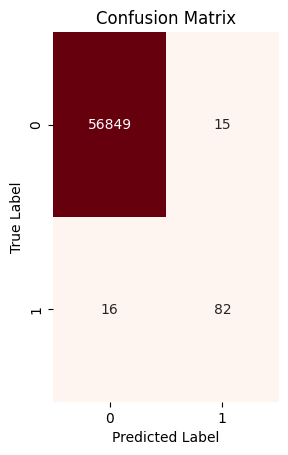

In [ ]:
# Ploting confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

<ipython-input-28-330fae3ccc77>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


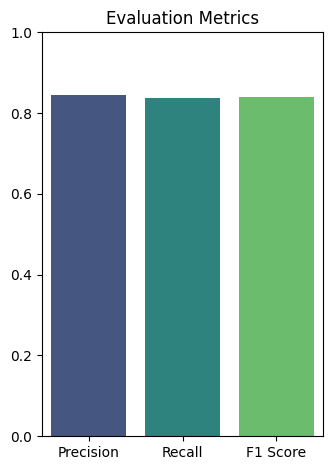

In [ ]:
# Ploting precision, recall, F1-score in a bar chart
metrics = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}
plt.subplot(1, 2, 2)
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.title("Evaluation Metrics")
plt.ylim(0, 1)

plt.tight_layout()
plt.show()